# CSE 627 Project 1- [House Price: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### *By Sooyeong Lim & Jason Zhao*




# Introduction

* **Why this competition?**

 The Kaggle competition we chose is *"House Price: Advanced Regression Techniques".* We selected this competition because of the following reasons:
 
 First, we can have a hands-on experience of high dimensional dataset. This data requires a lot of effort in feature engineering. This dataset contains many features (# 79) with both quantitative variables and categorical variables. This kind of high dimensional data is common in morden data science and having proper feature engineering skills is becomming an important skill. We believe that joining this competition helps us to equip this data engineering skill set in Python. 
 
 Second, this project helps us to solidify the knowledge we learned from the CSE 627 class. While we were participating in this competition, we implemented and compared the performances of various models. Starting from the Regularized model to the Neural Network based model, we built our model from scratch. We tried to understand every single line and implication of the model. We strongly believe that this project helped us a lot in terms of understanding the problem.
 

* **Executive Conclusion**

 Three different models-*Lasso Regression, XGBoost and Neural Network model* are proposed. Although validation rmse in training data results showed that Neural Network model is best model, but the model which shows best performance in the actual test data is Lasso regression model. We got rmse-0.12573 and landed us 1457th out of 4389 participants.

## Index 


* [Exploratory Data Analysis](#eda)
* [Feature Engineering](#fe)
* [Modeling](#modeling) 
    * [Lasso Regression](#r)
    * [XGBoost](#xgboost)
    * [Neural Network Model](#nn)
* [Results](#results) 
* [Limitations](#limitation)
* [Conclusion](#conclusion)
* [Reference/Resource](#reference)

<a id='eda'></a>
## Exploratory Data Analysis

 We checked the overall trends of data distribution and relationship between predictors and the response variable. By doing EDA, we roughly got a direction of analysis and this provided an insight for the feature engineerning and modeling in the next chapter.
 
 * **We are going to answer the following questions in EDA so that we can have a understanding of the problem:**


1. How many observations do we have? What is our concern? 
2. How many features are in the dataset and how many categorical & quantitative features are in the dataset?
3. What does the response variable looks like?
4. What are the relationships between predictors and response variable? are there any pairs of variables which have high correlations? 


* **Import packages and train & test data**

In [281]:
# Import packages for EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [282]:
# Import train & test dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [283]:
print(len(train.index))
print(len(test.index))

1460
1459


1. A) The number of training and test observations is almost equal (1460 and 1459 for each cases). Our concern is that the number of training data is relatively small if we consider the number of test data. We are afraid that our model is overfitted to the training dataset. 

* **Predictor variables**

In [284]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### **[Table. 1] Head of training dataset**

2. A) As we can see from above **[Table. 1]**, the features are a mixture categorical and quantitative variables. There are 36 quantitative varables and 46 categorical variables. After we looked into the data description in detail, we noticed that not all numerical values are quantitative variables. For instance, some variables are ordinal variables. If the features have some semantic characteristics, we tried to reflect them in the feature engineering part by re-coding the variables.

Below are the list of Qualitative & Quantitative variables 

**Quantitative:** 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

**Qualitative:** Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

* Response variable

In [285]:
train['SalePrice'].describe()
#Rough information of Response variable.. there is no 0's median, mean.. 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 0, 'Y')

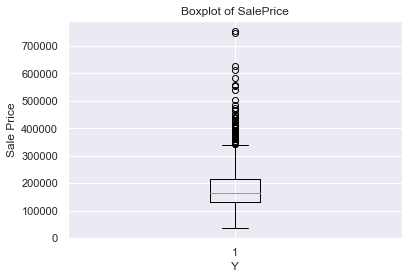

In [286]:
plt.boxplot(train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.ylabel('Sale Price')
plt.xlabel('Y')

* **[Figure. 1] Boxplot of SalePrice**

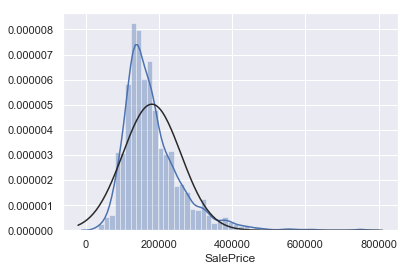

In [287]:
sns.distplot(train['SalePrice'],fit=norm)

* **[Figure.2] Distribution of SalePrice(Without transformation)**

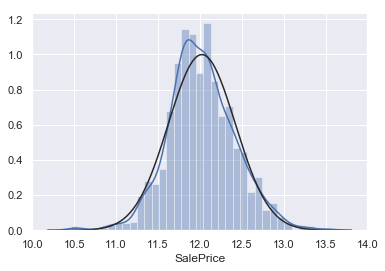

In [288]:
sns.distplot(np.log(train['SalePrice']), fit=norm)

* **[Figure. 3] Distribution of log-transformed SalePrice**

3. A) From a boxplot in [Figure.1], it seems like the distribution of response variable is right skewed. It means that observations are not centered around the mean. This skewedness of SalePrice can be problematic because the regression-based model assumes that Y~ N(XB,$\sigma^{2}$)
. One technique we can use is log-transformation. Log-transofrmation can make the distribution normal. By plotting the super-imposed pdf line in [Figure. 2], we verified that this skewed dataset is not following the normality assumption. In [Figure. 3], we verfied that the log-transformation satisfies the normality assumption.

* Correlation and relationship between response and predictor variables

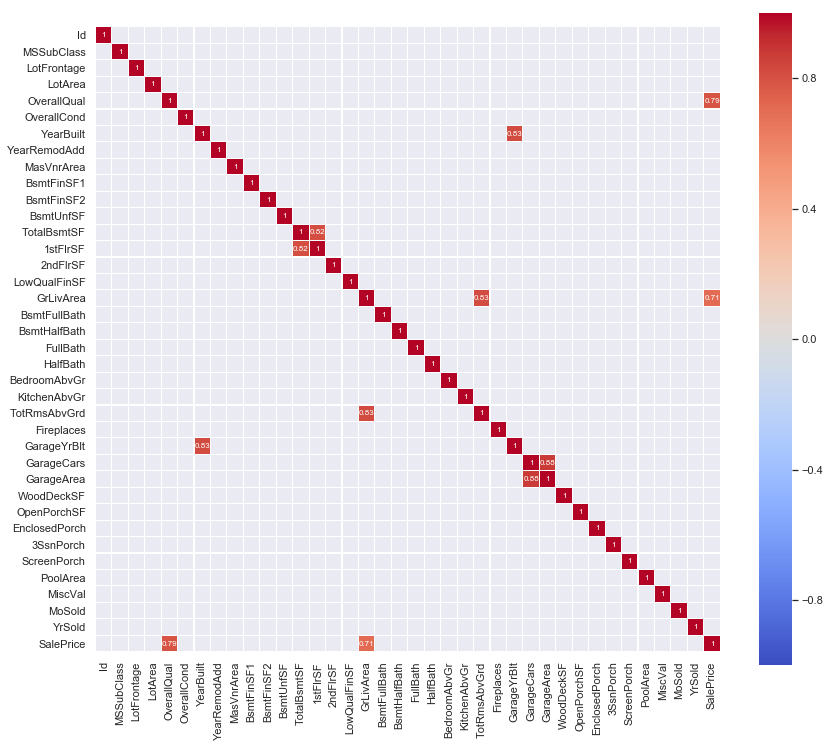

In [289]:
cor_mat=train.corr()
best_feat = train
corr =best_feat.corr() # We already examined SalePrice correlations
plt.figure(figsize=(14, 12))
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

* **[Figure. 4] Heatmap plot- Train data**

Heatmap plot in [Figure. 4] provides us with which variables are highly correlated. High correlationship suggest that the amount of information is similar. In this case, we don't have to contain both variables in the model. It seems like GarageCars and GrageArea provides almost equal information and it makes sense that if the garage can contain more cars then the size of the area of the garage naturally increases as well.

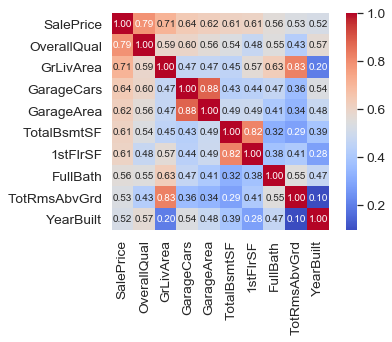

In [290]:
#Select top 10 for making prediction
k=10
cols=cor_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cmap='coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* **[Figure. 5] Heatmap plot- Top 10 preidictors**

[Figure.5 ]is the top 10 predictors in terms of correlation with SalePrice. For our next step, we are going to provide pairplot between these variables and the response variable.

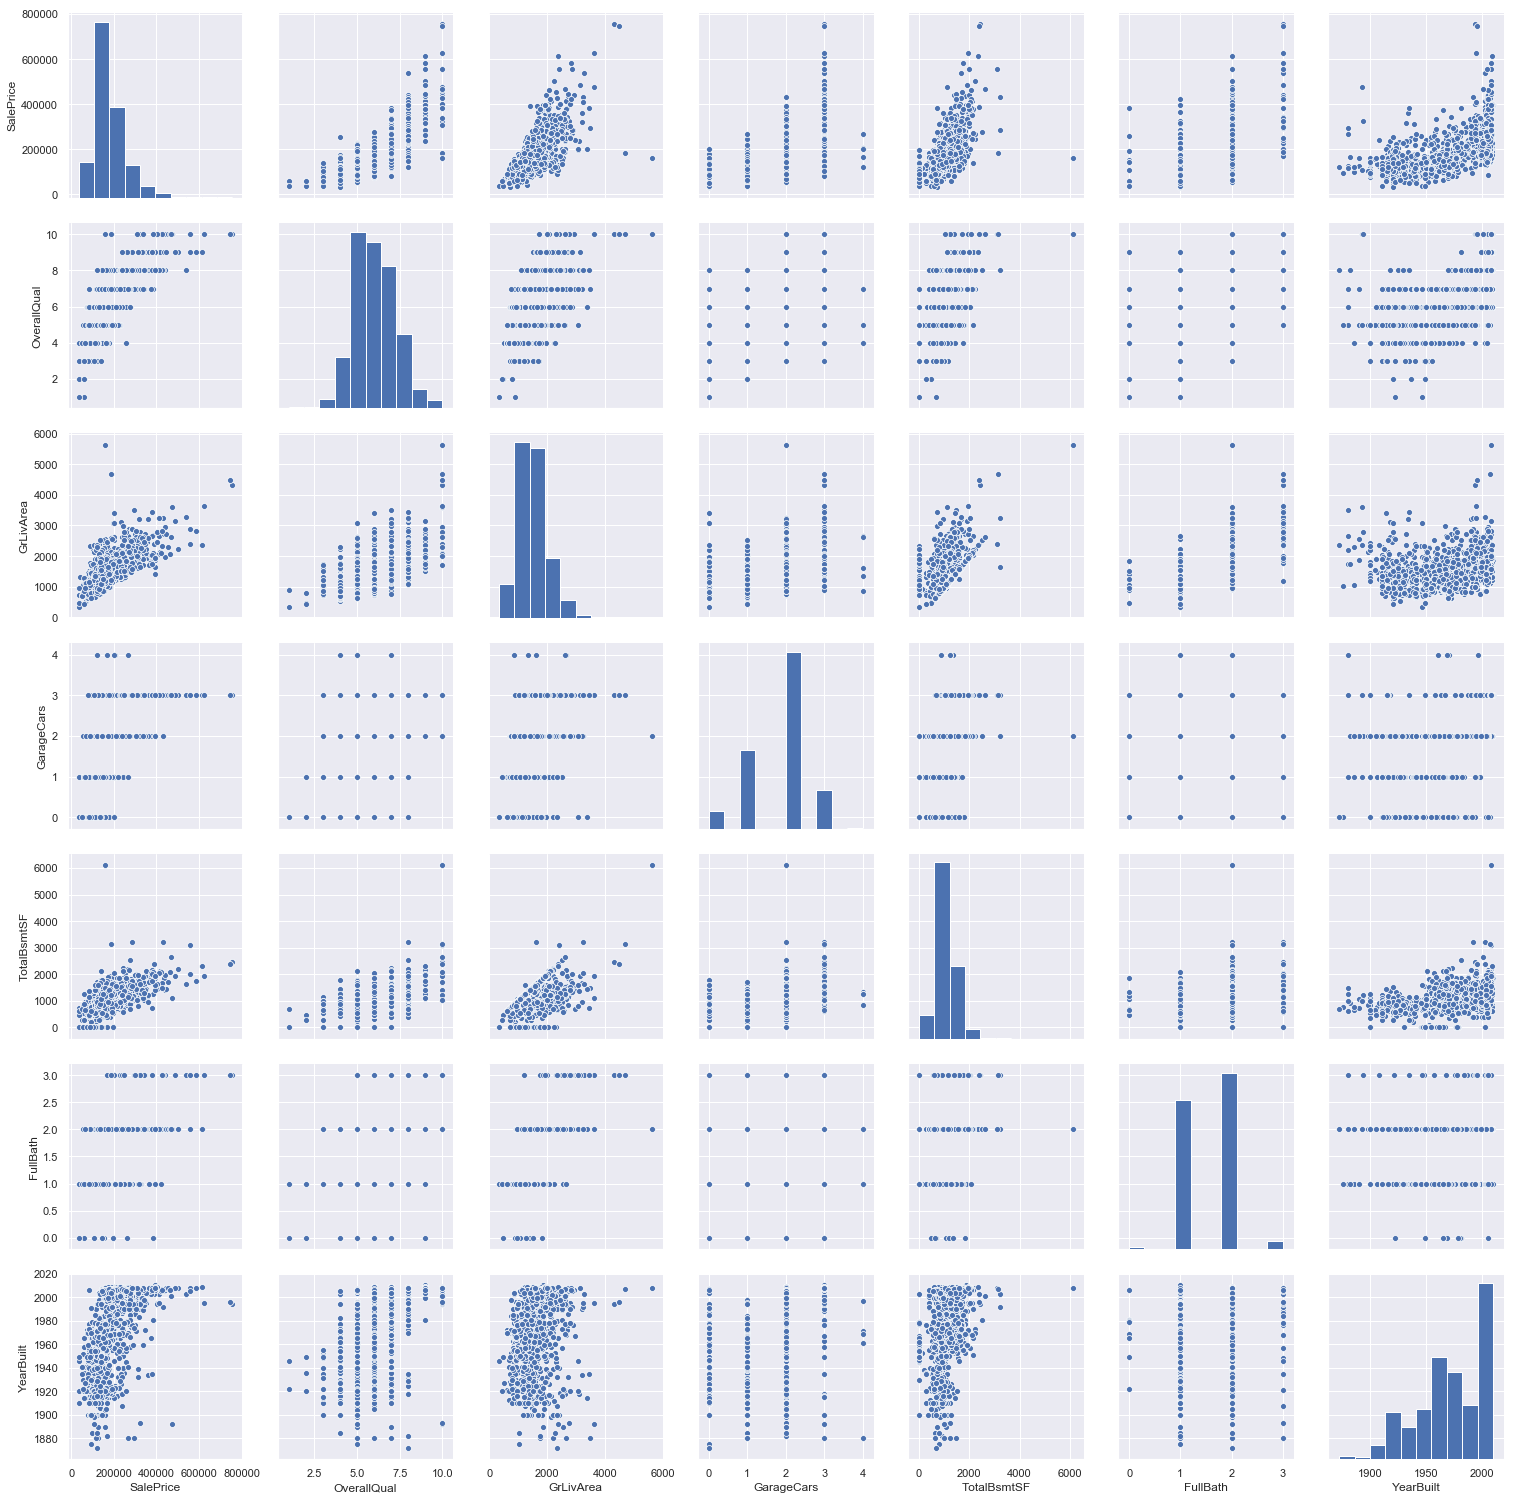

In [291]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols],size=3)
plt.show()

* **[Figure. 6] Pairplot with top 10 predictors and SalePrice**

4. A) As we can see in [Figure. 6], there is a linear or quadratic relationship between OverallQual and SalePrice. Also, we detect that there are two outliers in GRLivArea and one outlier in inTotalBmtSF. These outliers are 523rd and 1298th observations in the training data. In feature engieering section, we are going to delete those observations from the training dataset.


<a id='fe'></a>
## Feature Engineering

 A lot of effort was required in the Feature Engineering section. There are many missing observations in the train and test data, We imputed by using some tricks. We combined the train and test datasets all together and impute them to harness all the information we can have without violating any Kaggle competition's rule.For categorical data, there are some semantic characteristics. After we checked the data in detail, we realized that the relationship between predictors and Y is not just a linear relationship. 


In [292]:
# Import train & test dataset
train_data=train
test_data=test

In [293]:
# Dropped Id, since it is not relevant to the selling price.
train_data.drop('Id',axis=1,inplace=True)
test_data.drop('Id',axis=1,inplace=True)

* Handling missing variables

In [294]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


* **[Table. 2] List of missing variables and their ratio**

From [Table. 2], we can see that some variables' missing ratios are unusually high. After we carefully reviewed data dictionary, we noticed that these variables are not missing but the house doesn't have the facility. For instance, if the house does not have a swimming pool, it was marked as NA which can be converted as missing. We replaced those missings to 'None' or 0. 

In [295]:
# PoolQC with NaN means no pool, so we put None instead
train_data.PoolQC = train_data.PoolQC.fillna("None")
test_data.PoolQC = test_data.PoolQC.fillna("None")

In [296]:
# MiscFeature: Miscellaneous feature not covered in other categories
# NA means None, so we repaced with None
train_data.MiscFeature = train_data.MiscFeature.fillna("None")
test_data.MiscFeature = test_data.MiscFeature.fillna("None")

In [297]:
# If Alley is NA means there is no Alley access, so we change it to None
train_data.Alley = train_data.Alley.fillna("None")
test_data.Alley = test_data.Alley.fillna("None")

In [298]:
# If Fence is NA means there is no Fence
train_data.Fence = train_data.Fence.fillna("None")
test_data.Fence = test_data.Fence.fillna("None")

In [299]:
# If FireplaceQu is NA means there is no Fireplace
train_data.FireplaceQu = train_data.FireplaceQu.fillna("None")
test_data.FireplaceQu = test_data.FireplaceQu.fillna("None")

In [300]:
# If the house does not have a garage, GarageType GarageFinish GarageQual and GarageCond will be Na
for column in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [301]:
# If there is no basement, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual will be Na,
for column in ("BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [302]:
# Masonry veneer type
train_data.MasVnrType = train_data.MasVnrType.fillna("None")
test_data.MasVnrType = test_data.MasVnrType.fillna("None")

In [303]:
# since there is no garage, so we will set the year build at 0
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(0)
test_data.GarageYrBlt = test_data.GarageYrBlt.fillna(0)

# for testing data, GarageArea and GarageCars also has missing vlaue, we set them to 0 because they does not have garage
test_data.GarageArea = test_data.GarageArea.fillna(0)
test_data.GarageCars = test_data.GarageCars.fillna(0)

In [304]:
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)
test_data["MasVnrArea"] = test_data['MasVnrArea'].fillna(0)

In [305]:
test_data["TotalBsmtSF"] = test_data['TotalBsmtSF'].fillna(0)
test_data["BsmtFinSF1"] = test_data['BsmtFinSF1'].fillna(0)
test_data["BsmtFinSF2"] = test_data['BsmtFinSF2'].fillna(0)
test_data["BsmtUnfSF"] = test_data['BsmtUnfSF'].fillna(0)

In [306]:
test_data.MSZoning = test_data.MSZoning.fillna('RL')
test_data.Utilities = test_data.Utilities.fillna('AllPub')
test_data.Exterior1st = test_data.Exterior1st.fillna('VinylSd')
test_data.Exterior2nd = test_data.Exterior2nd.fillna('VinylSd')
test_data.BsmtFullBath = test_data.BsmtFullBath.fillna(0)
test_data.BsmtHalfBath = test_data.BsmtHalfBath.fillna(0)
test_data.KitchenQual = test_data.KitchenQual.fillna('TA')
test_data.Functional = test_data.Functional.fillna('Typ')
test_data.SaleType = test_data.SaleType.fillna('WD')

In [307]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
Electrical,0.068493


* **[Table. 3] List of missing variables and their ratio (After reflecting semantic meaning )**

As we can see from **[Table. 3]**, **'LotFrontage'** and **'Electrical'** still remained as missing. However, having these missing observations is not a serious issue here, because as we explored in EDA, these variables are not important compared to other variables. 

In [308]:
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [309]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio


* **[Table. 4] List of missing variables and their ratio (After imputation)**

**'LotFrontage'** is a quantitative variable and **'Electrical'** is a categorical variable. We imputed these missing variables with the most frequent observation point in Electrical variable and median for LotFrontage. In **[Table. 4]**, we verified that there are no missing varaibles remaining in the dataset.

* Handling variables with ordinal sequence or semantic meaning

In [310]:
train_data.MSZoning = train_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})
test_data.MSZoning = test_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})

In [311]:
train_data.Street = train_data.Street.map({'Grvl' : 1, 'Pave' : 2})
test_data.Street = test_data.Street.map({'Grvl' : 1, 'Pave' : 2})

In [312]:
train_data.Alley = train_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})
test_data.Alley = test_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})

In [313]:
train_data.LotShape = train_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})
test_data.LotShape = test_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})

In [314]:
train_data.LandContour = train_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})
test_data.LandContour = test_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})

In [315]:
train_data.Utilities = train_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})
test_data.Utilities = test_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})

In [316]:
train_data.LotConfig = train_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})
test_data.LotConfig = test_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})

In [317]:
train_data.LandSlope = train_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})
test_data.LandSlope = test_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})

In [318]:
Neighborhoodkeys =  train_data.Neighborhood.unique()
NeighborhoodMap = {}
i = 1
for key in Neighborhoodkeys:
    NeighborhoodMap[key] = i
    i += 1

In [319]:
train_data.Neighborhood = train_data.Neighborhood.map(NeighborhoodMap)
test_data.Neighborhood = test_data.Neighborhood.map(NeighborhoodMap)

In [320]:
ConditionMap = {'Norm': 3, 'Feedr': 4, 'PosN': 2, 'Artery': 4, 'RRAe': 1, 'RRNn': 1, 'RRAn': 1, 'PosA': 2, 'RRNe': 1}

train_data.Condition1 = train_data.Condition1.map(ConditionMap)
train_data.Condition2 = train_data.Condition2.map(ConditionMap)
test_data.Condition1 = test_data.Condition1.map(ConditionMap)
test_data.Condition2 = test_data.Condition2.map(ConditionMap)

In [321]:
train_data.BldgType = train_data.BldgType.map({'1Fam': 5, '2fmCon' :4, 'Duplex' :3, 'TwnhsE': 2, 'Twnhs':1})
test_data.BldgType = test_data.BldgType.map({'1Fam': 5, '2fmCon' :4, 'Duplex' :3, 'TwnhsE': 2, 'Twnhs':1})

In [322]:
train_data.HouseStyle = train_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})
test_data.HouseStyle = test_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})

In [323]:
train_data.RoofStyle = train_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})
test_data.RoofStyle = test_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})

In [324]:
train_data.RoofMatl = train_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})
test_data.RoofMatl = test_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})

In [325]:
e2K =  train_data.Exterior2nd.unique()
e2M = {}
i = 1
for key in e2K:
    e2M[key] = i
    i += 1

In [326]:
ExteriorMap = {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'HdBoard': 4, 'BrkFace': 5, 'WdShing': 6, 'CemntBd': 7, 'Plywood': 8, 'AsbShng': 9, 'Stucco': 10, 'BrkComm': 11, 'AsphShn': 12, 'Stone': 13, 'ImStucc': 14, 'CBlock': 15, 'Other':0}
train_data.Exterior1st = train_data.Exterior1st.map(ExteriorMap)
train_data.Exterior2nd = train_data.Exterior2nd.map(e2M)
test_data.Exterior1st = test_data.Exterior1st.map(ExteriorMap)
test_data.Exterior2nd = test_data.Exterior2nd.map(e2M)

In [327]:
# since has none, so we just samplify this featrue
train_data.MasVnrType = train_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
test_data.MasVnrType = test_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})

In [328]:
conditionMap = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}

In [329]:
train_data.ExterCond = train_data.ExterCond.map(conditionMap)
test_data.ExterCond = test_data.ExterCond.map(conditionMap)
train_data.ExterQual = train_data.ExterQual.map(conditionMap)
test_data.ExterQual = test_data.ExterQual.map(conditionMap)
train_data.BsmtQual = train_data.BsmtQual.map(conditionMap)
test_data.BsmtQual = test_data.BsmtQual.map(conditionMap)
train_data.BsmtCond = train_data.BsmtCond.map(conditionMap)
test_data.BsmtCond = test_data.BsmtCond.map(conditionMap)
train_data.HeatingQC = train_data.HeatingQC.map(conditionMap)
test_data.HeatingQC = test_data.HeatingQC.map(conditionMap)
train_data.KitchenQual = train_data.KitchenQual.map(conditionMap)
test_data.KitchenQual = test_data.KitchenQual.map(conditionMap)
train_data.FireplaceQu = train_data.FireplaceQu.map(conditionMap)
test_data.FireplaceQu = test_data.FireplaceQu.map(conditionMap)
train_data.GarageQual = train_data.GarageQual.map(conditionMap)
test_data.GarageQual = test_data.GarageQual.map(conditionMap)
train_data.GarageCond = train_data.GarageCond.map(conditionMap)
test_data.GarageCond = test_data.GarageCond.map(conditionMap)
train_data.PoolQC = train_data.PoolQC.map(conditionMap)
test_data.PoolQC = test_data.PoolQC.map(conditionMap)

In [330]:
train_data.Foundation = train_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})
test_data.Foundation = test_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})

In [331]:
train_data.BsmtExposure = train_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})
test_data.BsmtExposure = test_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})

In [332]:
BsmtFinTypeMap = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

In [333]:
train_data.BsmtFinType1 = train_data.BsmtFinType1.map(BsmtFinTypeMap)
train_data.BsmtFinType2 = train_data.BsmtFinType2.map(BsmtFinTypeMap)
test_data.BsmtFinType1 = test_data.BsmtFinType1.map(BsmtFinTypeMap)
test_data.BsmtFinType2 = test_data.BsmtFinType2.map(BsmtFinTypeMap)

In [334]:
train_data.Heating = train_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})
test_data.Heating = test_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})

In [335]:
train_data.CentralAir = train_data.CentralAir.map({'Y': 1, 'N': 0})
test_data.CentralAir = test_data.CentralAir.map({'Y': 1, 'N': 0})

In [336]:
train_data.Electrical = train_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})
test_data.Electrical = test_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})

In [337]:
train_data.Functional = train_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})
test_data.Functional = test_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})

In [338]:
train_data.GarageType = train_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basment':4, 'CarPort':5, '2Types':6})
test_data.GarageType = test_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basment':4, 'CarPort':5, '2Types':6})

In [339]:
train_data.GarageFinish = train_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})
test_data.GarageFinish = test_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})

In [340]:
train_data.PavedDrive = train_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})
test_data.PavedDrive = test_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})

In [341]:
train_data.Fence = train_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})
test_data.Fence = test_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})

In [342]:
train_data.MiscFeature = train_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})
test_data.MiscFeature = test_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})

In [343]:
train_data.SaleType = train_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})
test_data.SaleType = test_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})

In [344]:
train_data.SaleCondition = train_data.SaleCondition.map({'Normal': 1, 'Abnorml': 0, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})
test_data.SaleCondition = test_data.SaleCondition.map({'Normal': 1, 'Abnorml': 0, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})

* Hadnling outliers

In [345]:
# drop outliersa
train_data = train_data.drop([523,1298])

As we checked from **[Figure 6]** in EDA, there are two outliers in the predictors. We are going to delete these observations because the oultiers may become influential points and having infulential points in our model will deteriorate our model's accuracy.

<a id='modeling'></a>
## Modeling

We used [Lasso](#r), [Xgboost](#xgboost), [Neural Network](#nn) for modeling. To find optimal parameters for Lasso and XGboost, we used grid search method. In the case of Neural Network model, we tried severaldifferent numbers of neurons and hidden layers heuristically.

In [347]:
# Import needed libaries
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.metrics import make_scorer

In [348]:
#Get labels by select SalePrice
y_log=np.log(train_data['SalePrice'])
train_data.drop('SalePrice',axis=1,inplace=True)

In [349]:
from sklearn.model_selection import cross_val_score, train_test_split

In [350]:
# Partition the dataset in test + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y_log, test_size = 0.2, shuffle = True)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))
#Define 70% is used as testing data and 30% is test dataset.

X_train : (1166, 79)
X_test : (292, 79)
y_train : (1166,)
y_test : (292,)


* To find optimal hyperparameters in the suggested models, we decided to use grid search method. 

In [351]:
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

rmse_scorer = make_scorer(rmse, greater_is_better=False)

def train_Model(model, param_grid=[], splits=5, repeats=5):
    
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    # setup grid search parameters
    gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                           scoring=rmse_scorer,
                           verbose=1, return_train_score=True)

    # search the grid
    gsearch.fit(X_train,y_train)

    # extract best model from the grid
    model = gsearch.best_estimator_        
    best_idx = gsearch.best_index_

    # get cv-scores for best model
    grid_results = pd.DataFrame(gsearch.cv_results_)       
    cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
    cv_std = grid_results.loc[best_idx,'std_test_score']
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X_train)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=',model.score(X_train,y_train))
    print('rmse=',rmse(y_train, y_pred))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y_train.index)
    resid = y_train - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid    
    n_outliers = sum(abs(z)>3)
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y_train,y_pred,'.')
    plt.xlabel('y_train')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y_train,y_pred)[0][1]))
    ax_132=plt.subplot(1,3,2)
    plt.plot(y_train,y_train-y_pred,'.')
    plt.xlabel('y_train')
    plt.ylabel('y_train - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))
    return model, cv_score, grid_results



<a id='r'></a>
### Lasso regression

Fitting 25 folds for each of 50 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:   13.4s finished


----------------------
Lasso(alpha=0.00201, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
----------------------
score= 0.9117379763230888
rmse= 0.11994975512860982
cross_val: mean= 0.12741400070099956 , std= 0.009671359697523533


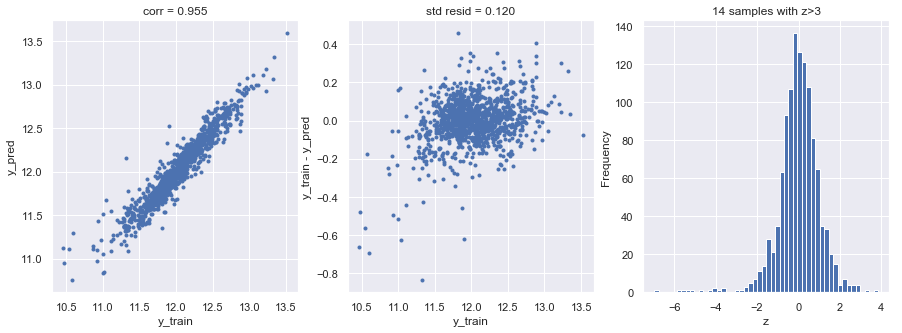

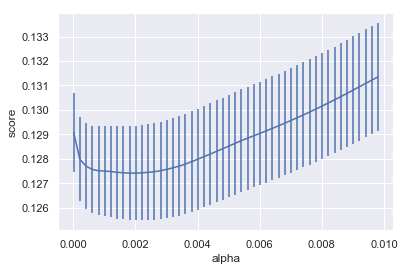

In [356]:
lasso = Lasso()
alph_range = np.arange(0.00001,0.01,0.0002)
param_grid = {'alpha': alph_range}
best_lasso_Model,cv_score,grid_results= train_Model(lasso, param_grid=param_grid)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(5*5))
plt.xlabel('alpha')
plt.ylabel('score');

* **[Figure. 7] Model fitting result- Lasso**

In [357]:
best_lasso_Model

Lasso(alpha=0.00201, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Firstly, we found the range of parameter of alpha heuristically (0.00001, 0.01). After we found the range, we used grid search method to find an optimal alpha value. Alpha versus score plot in [Figure. 7] shows that optimal alpha is 0.00201 and its rmse is 0.11994975512860982.

In [360]:
y_test_lasso=best_lasso_Model.predict(test_data)

In [362]:
test=pd.read_csv('test.csv')
solution = pd.DataFrame({"id":test.Id, "SalePrice":np.exp(y_test_lasso)}, columns=['id', 'SalePrice'])
solution.to_csv("result_lasso.csv", index = False)

<a id='xgboost'></a>
### Xgboost

In [138]:
import xgboost

In [ ]:
model_xgb = xgboost.XGBRegressor(learning_rate=0.1,n_estimators=500,max_depth=10)
param_grid = {'reg_alpha':[0.01, 0.3, 0.5],
              'reg_lambda':[0.01, 0.3, 0.5]
             }
best_xgb, cv_score,grid_results = train_Model(model_xgb, param_grid=param_grid, )

In [394]:
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [395]:
# Training
best_xgb.fit(X_train, y_train, early_stopping_rounds=10000, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:10.3904
Will train until validation_0-rmse hasn't improved in 10000 rounds.
[1]	validation_0-rmse:9.35508
[2]	validation_0-rmse:8.42334
[3]	validation_0-rmse:7.58603
[4]	validation_0-rmse:6.83243
[5]	validation_0-rmse:6.15317
[6]	validation_0-rmse:5.54275
[7]	validation_0-rmse:4.99254
[8]	validation_0-rmse:4.49759
[9]	validation_0-rmse:4.05308
[10]	validation_0-rmse:3.65236
[11]	validation_0-rmse:3.29095
[12]	validation_0-rmse:2.96554
[13]	validation_0-rmse:2.67333
[14]	validation_0-rmse:2.41099
[15]	validation_0-rmse:2.17426
[16]	validation_0-rmse:1.96085
[17]	validation_0-rmse:1.76903
[18]	validation_0-rmse:1.597
[19]	validation_0-rmse:1.44253
[20]	validation_0-rmse:1.3035
[21]	validation_0-rmse:1.17896
[22]	validation_0-rmse:1.06676
[23]	validation_0-rmse:0.966066
[24]	validation_0-rmse:0.875762
[25]	validation_0-rmse:0.795022
[26]	validation_0-rmse:0.722396
[27]	validation_0-rmse:0.657077
[28]	validation_0-rmse:0.598952
[29]	validation_0-rmse:0.546686
[30]	val

[252]	validation_0-rmse:0.116532
[253]	validation_0-rmse:0.116465
[254]	validation_0-rmse:0.116409
[255]	validation_0-rmse:0.116233
[256]	validation_0-rmse:0.116127
[257]	validation_0-rmse:0.116061
[258]	validation_0-rmse:0.116019
[259]	validation_0-rmse:0.115921
[260]	validation_0-rmse:0.116131
[261]	validation_0-rmse:0.115979
[262]	validation_0-rmse:0.115975
[263]	validation_0-rmse:0.115988
[264]	validation_0-rmse:0.115898
[265]	validation_0-rmse:0.115778
[266]	validation_0-rmse:0.115721
[267]	validation_0-rmse:0.115725
[268]	validation_0-rmse:0.115663
[269]	validation_0-rmse:0.11567
[270]	validation_0-rmse:0.115646
[271]	validation_0-rmse:0.115601
[272]	validation_0-rmse:0.115632
[273]	validation_0-rmse:0.115544
[274]	validation_0-rmse:0.115502
[275]	validation_0-rmse:0.115598
[276]	validation_0-rmse:0.115526
[277]	validation_0-rmse:0.115464
[278]	validation_0-rmse:0.115469
[279]	validation_0-rmse:0.115311
[280]	validation_0-rmse:0.115519
[281]	validation_0-rmse:0.115451
[282]	valid

[502]	validation_0-rmse:0.11235
[503]	validation_0-rmse:0.112348
[504]	validation_0-rmse:0.112299
[505]	validation_0-rmse:0.11233
[506]	validation_0-rmse:0.112325
[507]	validation_0-rmse:0.112308
[508]	validation_0-rmse:0.11233
[509]	validation_0-rmse:0.112296
[510]	validation_0-rmse:0.112328
[511]	validation_0-rmse:0.11229
[512]	validation_0-rmse:0.112296
[513]	validation_0-rmse:0.112293
[514]	validation_0-rmse:0.112261
[515]	validation_0-rmse:0.112257
[516]	validation_0-rmse:0.112331
[517]	validation_0-rmse:0.112335
[518]	validation_0-rmse:0.112314
[519]	validation_0-rmse:0.112297
[520]	validation_0-rmse:0.112319
[521]	validation_0-rmse:0.112294
[522]	validation_0-rmse:0.112292
[523]	validation_0-rmse:0.112259
[524]	validation_0-rmse:0.112276
[525]	validation_0-rmse:0.112268
[526]	validation_0-rmse:0.112303
[527]	validation_0-rmse:0.112129
[528]	validation_0-rmse:0.112095
[529]	validation_0-rmse:0.112109
[530]	validation_0-rmse:0.11214
[531]	validation_0-rmse:0.112119
[532]	validatio

[752]	validation_0-rmse:0.111111
[753]	validation_0-rmse:0.11111
[754]	validation_0-rmse:0.111094
[755]	validation_0-rmse:0.111069
[756]	validation_0-rmse:0.111065
[757]	validation_0-rmse:0.111051
[758]	validation_0-rmse:0.111059
[759]	validation_0-rmse:0.111049
[760]	validation_0-rmse:0.111012
[761]	validation_0-rmse:0.110985
[762]	validation_0-rmse:0.111033
[763]	validation_0-rmse:0.111031
[764]	validation_0-rmse:0.111033
[765]	validation_0-rmse:0.111038
[766]	validation_0-rmse:0.11101
[767]	validation_0-rmse:0.111012
[768]	validation_0-rmse:0.110989
[769]	validation_0-rmse:0.111016
[770]	validation_0-rmse:0.111016
[771]	validation_0-rmse:0.110975
[772]	validation_0-rmse:0.110982
[773]	validation_0-rmse:0.110961
[774]	validation_0-rmse:0.110976
[775]	validation_0-rmse:0.110967
[776]	validation_0-rmse:0.110965
[777]	validation_0-rmse:0.110938
[778]	validation_0-rmse:0.110923
[779]	validation_0-rmse:0.110947
[780]	validation_0-rmse:0.11097
[781]	validation_0-rmse:0.110939
[782]	validat

[1002]	validation_0-rmse:0.110283
[1003]	validation_0-rmse:0.110233
[1004]	validation_0-rmse:0.110234
[1005]	validation_0-rmse:0.110281
[1006]	validation_0-rmse:0.110274
[1007]	validation_0-rmse:0.110295
[1008]	validation_0-rmse:0.110333
[1009]	validation_0-rmse:0.110335
[1010]	validation_0-rmse:0.110381
[1011]	validation_0-rmse:0.110421
[1012]	validation_0-rmse:0.110365
[1013]	validation_0-rmse:0.110363
[1014]	validation_0-rmse:0.110371
[1015]	validation_0-rmse:0.110364
[1016]	validation_0-rmse:0.110284
[1017]	validation_0-rmse:0.110268
[1018]	validation_0-rmse:0.11028
[1019]	validation_0-rmse:0.110307
[1020]	validation_0-rmse:0.11031
[1021]	validation_0-rmse:0.110277
[1022]	validation_0-rmse:0.110278
[1023]	validation_0-rmse:0.110278
[1024]	validation_0-rmse:0.110286
[1025]	validation_0-rmse:0.110277
[1026]	validation_0-rmse:0.110285
[1027]	validation_0-rmse:0.110209
[1028]	validation_0-rmse:0.1102
[1029]	validation_0-rmse:0.110178
[1030]	validation_0-rmse:0.110168
[1031]	validation_

[1244]	validation_0-rmse:0.110161
[1245]	validation_0-rmse:0.110157
[1246]	validation_0-rmse:0.110151
[1247]	validation_0-rmse:0.110151
[1248]	validation_0-rmse:0.110146
[1249]	validation_0-rmse:0.110079
[1250]	validation_0-rmse:0.110063
[1251]	validation_0-rmse:0.110083
[1252]	validation_0-rmse:0.110082
[1253]	validation_0-rmse:0.110083
[1254]	validation_0-rmse:0.110125
[1255]	validation_0-rmse:0.110102
[1256]	validation_0-rmse:0.1101
[1257]	validation_0-rmse:0.110114
[1258]	validation_0-rmse:0.110121
[1259]	validation_0-rmse:0.110099
[1260]	validation_0-rmse:0.110103
[1261]	validation_0-rmse:0.110102
[1262]	validation_0-rmse:0.110102
[1263]	validation_0-rmse:0.110097
[1264]	validation_0-rmse:0.110057
[1265]	validation_0-rmse:0.110029
[1266]	validation_0-rmse:0.109992
[1267]	validation_0-rmse:0.110013
[1268]	validation_0-rmse:0.110006
[1269]	validation_0-rmse:0.110025
[1270]	validation_0-rmse:0.110003
[1271]	validation_0-rmse:0.110016
[1272]	validation_0-rmse:0.109999
[1273]	validatio

[1486]	validation_0-rmse:0.109885
[1487]	validation_0-rmse:0.109885
[1488]	validation_0-rmse:0.109897
[1489]	validation_0-rmse:0.109863
[1490]	validation_0-rmse:0.109872
[1491]	validation_0-rmse:0.109848
[1492]	validation_0-rmse:0.109863
[1493]	validation_0-rmse:0.109851
[1494]	validation_0-rmse:0.109852
[1495]	validation_0-rmse:0.109794
[1496]	validation_0-rmse:0.10983
[1497]	validation_0-rmse:0.109843
[1498]	validation_0-rmse:0.109852
[1499]	validation_0-rmse:0.109884
[1500]	validation_0-rmse:0.109822
[1501]	validation_0-rmse:0.109788
[1502]	validation_0-rmse:0.109804
[1503]	validation_0-rmse:0.109801
[1504]	validation_0-rmse:0.109821
[1505]	validation_0-rmse:0.109814
[1506]	validation_0-rmse:0.109821
[1507]	validation_0-rmse:0.109849
[1508]	validation_0-rmse:0.109842
[1509]	validation_0-rmse:0.10981
[1510]	validation_0-rmse:0.109813
[1511]	validation_0-rmse:0.109794
[1512]	validation_0-rmse:0.109755
[1513]	validation_0-rmse:0.109764
[1514]	validation_0-rmse:0.109743
[1515]	validatio

[1728]	validation_0-rmse:0.109651
[1729]	validation_0-rmse:0.109652
[1730]	validation_0-rmse:0.109631
[1731]	validation_0-rmse:0.10961
[1732]	validation_0-rmse:0.109621
[1733]	validation_0-rmse:0.109607
[1734]	validation_0-rmse:0.109637
[1735]	validation_0-rmse:0.109648
[1736]	validation_0-rmse:0.109642
[1737]	validation_0-rmse:0.109623
[1738]	validation_0-rmse:0.109649
[1739]	validation_0-rmse:0.109619
[1740]	validation_0-rmse:0.10962
[1741]	validation_0-rmse:0.109603
[1742]	validation_0-rmse:0.109601
[1743]	validation_0-rmse:0.109609
[1744]	validation_0-rmse:0.109609
[1745]	validation_0-rmse:0.109607
[1746]	validation_0-rmse:0.109668
[1747]	validation_0-rmse:0.109669
[1748]	validation_0-rmse:0.10966
[1749]	validation_0-rmse:0.109641
[1750]	validation_0-rmse:0.109649
[1751]	validation_0-rmse:0.10965
[1752]	validation_0-rmse:0.109662
[1753]	validation_0-rmse:0.109647
[1754]	validation_0-rmse:0.10966
[1755]	validation_0-rmse:0.109659
[1756]	validation_0-rmse:0.109657
[1757]	validation_0

[1970]	validation_0-rmse:0.109519
[1971]	validation_0-rmse:0.109556
[1972]	validation_0-rmse:0.109569
[1973]	validation_0-rmse:0.109549
[1974]	validation_0-rmse:0.109542
[1975]	validation_0-rmse:0.109549
[1976]	validation_0-rmse:0.109531
[1977]	validation_0-rmse:0.109524
[1978]	validation_0-rmse:0.109519
[1979]	validation_0-rmse:0.109508
[1980]	validation_0-rmse:0.109514
[1981]	validation_0-rmse:0.109516
[1982]	validation_0-rmse:0.109515
[1983]	validation_0-rmse:0.109524
[1984]	validation_0-rmse:0.109525
[1985]	validation_0-rmse:0.109497
[1986]	validation_0-rmse:0.109508
[1987]	validation_0-rmse:0.109505
[1988]	validation_0-rmse:0.109505
[1989]	validation_0-rmse:0.109508
[1990]	validation_0-rmse:0.109523
[1991]	validation_0-rmse:0.109531
[1992]	validation_0-rmse:0.109528
[1993]	validation_0-rmse:0.109527
[1994]	validation_0-rmse:0.109538
[1995]	validation_0-rmse:0.109533
[1996]	validation_0-rmse:0.109537
[1997]	validation_0-rmse:0.109533
[1998]	validation_0-rmse:0.109536
[1999]	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [396]:
y_test_xgb= best_xgb.predict(test_data)

In [397]:
y_test_xgb

array([11.707645, 11.987763, 12.116559, ..., 12.026226, 11.689289,
       12.288509], dtype=float32)

In [398]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":np.exp(y_test_xgb)}, columns=['id', 'SalePrice'])
solution.to_csv("result_xgb.csv", index = False)

We tried various set of hyperparameters to fit XGboost model. Although XGboost model's the rmse score with training datset is 0.109 and it is lower than lasso model, this ended up overfitting to training data. We concluded this way because the leader board score in [Result](#results) shows its rmse is higher than lasso model. 

<a id='nn'></a>
### Neural Network Based Model

In [403]:
import keras

Using TensorFlow backend.


In [404]:
seed = 7
np.random.seed(seed)

In [467]:
# Create a model and add layers
kerasModel = keras.models.Sequential()
kerasModel.add(keras.layers.Dense(200, input_dim = X_train.shape[1],activation='relu'))
kerasModel.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(25,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(12,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(1,kernel_initializer='normal'))
kerasModel.summary()

# We tried more complex model but the performance became worse
#kerasModel2 = keras.models.Sequential()
#kerasModel2.add(keras.layers.Dense(1000, input_dim = X_train.shape[1],activation='relu'))
#kerasModel2.add(keras.layers.Dense(500,kernel_initializer='normal',activation='relu'))
#kerasModel2.add(keras.layers.Dense(250,kernel_initializer='normal',activation='relu'))
#kerasModel2.add(keras.layers.Dense(125,kernel_initializer='normal',activation='relu'))
#kerasModel2.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
#kerasModel2.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
#kerasModel2.add(keras.layers.Dense(25,kernel_initializer='normal',activation='relu'))
#kerasModel2.add(keras.layers.Dense(1,kernel_initializer='normal'))
#kerasModel2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 200)               16000     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_23 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_24 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_25 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 13        
Total params: 42,750
Trainable params: 42,750
Non-trainable params: 0
_________________________________________________________________
______

In [468]:
# Define another loss function
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [482]:
# Set loss function and optimizer
kerasModel.compile(loss = 'mse', optimizer = "adam")
#kerasModel2.compile(loss = 'mse', optimizer = "adam")

In [483]:
# Set callback function which will ealystop when val_loss does not become better in 50 epochs
# save the best model
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=50),
            keras.callbacks.ModelCheckpoint('best.h5', monitor='val_loss', save_best_only=True, mode='min')]

In [484]:
## Train
history = kerasModel.fit(X_train, y_train, epochs=1000, validation_data = (X_test, y_test))
#history2 = kerasModel2.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test))

Train on 1166 samples, validate on 292 samples
Epoch 1/1000
1166/1166 [==============================] - 2s 1ms/step - loss: 25.9105 - val_loss: 6.4310
Epoch 2/1000
1166/1166 [==============================] - 0s 126us/step - loss: 2.1658 - val_loss: 0.8750
Epoch 3/1000
1166/1166 [==============================] - 0s 124us/step - loss: 0.8009 - val_loss: 0.6640
Epoch 4/1000
1166/1166 [==============================] - 0s 165us/step - loss: 0.3345 - val_loss: 0.3203
Epoch 5/1000
1166/1166 [==============================] - 0s 120us/step - loss: 0.1140 - val_loss: 0.2074
Epoch 6/1000
1166/1166 [==============================] - 0s 119us/step - loss: 0.1518 - val_loss: 0.2802
Epoch 7/1000
1166/1166 [==============================] - 0s 112us/step - loss: 0.3331 - val_loss: 0.0931
Epoch 8/1000
1166/1166 [==============================] - 0s 116us/step - loss: 0.0678 - val_loss: 0.0806
Epoch 9/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0579 - val_loss: 0.1582


1166/1166 [==============================] - 0s 120us/step - loss: 0.0445 - val_loss: 0.0544
Epoch 78/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.0298 - val_loss: 0.0760
Epoch 79/1000
1166/1166 [==============================] - 0s 116us/step - loss: 0.0819 - val_loss: 0.0723
Epoch 80/1000
1166/1166 [==============================] - ETA: 0s - loss: 0.096 - 0s 164us/step - loss: 0.1066 - val_loss: 0.5044
Epoch 81/1000
1166/1166 [==============================] - 0s 213us/step - loss: 0.1854 - val_loss: 0.1130
Epoch 82/1000
1166/1166 [==============================] - 0s 174us/step - loss: 0.1118 - val_loss: 0.2002
Epoch 83/1000
1166/1166 [==============================] - 0s 148us/step - loss: 0.1032 - val_loss: 0.0929
Epoch 84/1000
1166/1166 [==============================] - 0s 143us/step - loss: 0.0738 - val_loss: 0.0955
Epoch 85/1000
1166/1166 [==============================] - 0s 165us/step - loss: 0.0496 - val_loss: 0.0735
Epoch 86/1000
1166/1166 [==

Epoch 153/1000
1166/1166 [==============================] - 0s 129us/step - loss: 0.0348 - val_loss: 0.0611
Epoch 154/1000
1166/1166 [==============================] - 0s 107us/step - loss: 0.0442 - val_loss: 0.0733
Epoch 155/1000
1166/1166 [==============================] - 0s 114us/step - loss: 0.0448 - val_loss: 0.1044
Epoch 156/1000
1166/1166 [==============================] - 0s 115us/step - loss: 0.0972 - val_loss: 0.2247
Epoch 157/1000
1166/1166 [==============================] - 0s 122us/step - loss: 0.0672 - val_loss: 0.1851
Epoch 158/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.0637 - val_loss: 0.0765
Epoch 159/1000
1166/1166 [==============================] - 0s 114us/step - loss: 0.0820 - val_loss: 0.1114
Epoch 160/1000
1166/1166 [==============================] - 0s 141us/step - loss: 0.0969 - val_loss: 0.3179
Epoch 161/1000
1166/1166 [==============================] - 0s 119us/step - loss: 0.2164 - val_loss: 0.1971
Epoch 162/1000
1166/1166 [==

Epoch 229/1000
1166/1166 [==============================] - 0s 126us/step - loss: 0.0479 - val_loss: 0.0993
Epoch 230/1000
1166/1166 [==============================] - 0s 118us/step - loss: 0.0408 - val_loss: 0.0565
Epoch 231/1000
1166/1166 [==============================] - 0s 111us/step - loss: 0.0319 - val_loss: 0.1119
Epoch 232/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0414 - val_loss: 0.0669
Epoch 233/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0230 - val_loss: 0.0576
Epoch 234/1000
1166/1166 [==============================] - 0s 114us/step - loss: 0.0336 - val_loss: 0.0661
Epoch 235/1000
1166/1166 [==============================] - 0s 122us/step - loss: 0.0251 - val_loss: 0.0639
Epoch 236/1000
1166/1166 [==============================] - 0s 131us/step - loss: 0.0385 - val_loss: 0.0580
Epoch 237/1000
1166/1166 [==============================] - 0s 131us/step - loss: 0.0252 - val_loss: 0.0611
Epoch 238/1000
1166/1166 [==

Epoch 305/1000
1166/1166 [==============================] - 0s 118us/step - loss: 0.0290 - val_loss: 0.0597
Epoch 306/1000
1166/1166 [==============================] - 0s 119us/step - loss: 0.0294 - val_loss: 0.0639
Epoch 307/1000
1166/1166 [==============================] - 0s 113us/step - loss: 0.0358 - val_loss: 0.1212
Epoch 308/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0443 - val_loss: 0.0828
Epoch 309/1000
1166/1166 [==============================] - 0s 115us/step - loss: 0.0337 - val_loss: 0.0515
Epoch 310/1000
1166/1166 [==============================] - 0s 118us/step - loss: 0.0237 - val_loss: 0.0666
Epoch 311/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0217 - val_loss: 0.0839
Epoch 312/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.0286 - val_loss: 0.0621
Epoch 313/1000
1166/1166 [==============================] - 0s 116us/step - loss: 0.0210 - val_loss: 0.0734
Epoch 314/1000
1166/1166 [==

Epoch 381/1000
1166/1166 [==============================] - 0s 119us/step - loss: 0.0452 - val_loss: 0.2157
Epoch 382/1000
1166/1166 [==============================] - 0s 113us/step - loss: 0.0522 - val_loss: 0.0992
Epoch 383/1000
1166/1166 [==============================] - 0s 116us/step - loss: 0.0570 - val_loss: 0.0956
Epoch 384/1000
1166/1166 [==============================] - 0s 120us/step - loss: 0.0361 - val_loss: 0.0697
Epoch 385/1000
1166/1166 [==============================] - 0s 112us/step - loss: 0.0562 - val_loss: 0.1221
Epoch 386/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0313 - val_loss: 0.1026
Epoch 387/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0247 - val_loss: 0.0761
Epoch 388/1000
1166/1166 [==============================] - 0s 124us/step - loss: 0.0233 - val_loss: 0.1103
Epoch 389/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0742 - val_loss: 0.3098
Epoch 390/1000
1166/1166 [==

1166/1166 [==============================] - 0s 147us/step - loss: 0.0177 - val_loss: 0.0655
Epoch 457/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0185 - val_loss: 0.0912
Epoch 458/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0192 - val_loss: 0.0773
Epoch 459/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0174 - val_loss: 0.0773
Epoch 460/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.0214 - val_loss: 0.1019
Epoch 461/1000
1166/1166 [==============================] - 0s 111us/step - loss: 0.0156 - val_loss: 0.0860
Epoch 462/1000
1166/1166 [==============================] - 0s 111us/step - loss: 0.0201 - val_loss: 0.0965
Epoch 463/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.0198 - val_loss: 0.1062
Epoch 464/1000
1166/1166 [==============================] - 0s 111us/step - loss: 0.0213 - val_loss: 0.1086
Epoch 465/1000
1166/1166 [=================

Epoch 532/1000
1166/1166 [==============================] - 0s 122us/step - loss: 0.0167 - val_loss: 0.0673
Epoch 533/1000
1166/1166 [==============================] - 0s 114us/step - loss: 0.0133 - val_loss: 0.0993
Epoch 534/1000
1166/1166 [==============================] - 0s 115us/step - loss: 0.0147 - val_loss: 0.0778
Epoch 535/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0168 - val_loss: 0.0805
Epoch 536/1000
1166/1166 [==============================] - 0s 131us/step - loss: 0.0185 - val_loss: 0.1005
Epoch 537/1000
1166/1166 [==============================] - 0s 113us/step - loss: 0.0155 - val_loss: 0.1127
Epoch 538/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0321 - val_loss: 0.1014
Epoch 539/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0852 - val_loss: 0.1517
Epoch 540/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0687 - val_loss: 0.0983
Epoch 541/1000
1166/1166 [==

Epoch 608/1000
1166/1166 [==============================] - 0s 124us/step - loss: 0.0178 - val_loss: 0.0769
Epoch 609/1000
1166/1166 [==============================] - 0s 122us/step - loss: 0.0150 - val_loss: 0.0588
Epoch 610/1000
1166/1166 [==============================] - 0s 112us/step - loss: 0.0125 - val_loss: 0.0577
Epoch 611/1000
1166/1166 [==============================] - 0s 127us/step - loss: 0.0135 - val_loss: 0.0570
Epoch 612/1000
1166/1166 [==============================] - 0s 112us/step - loss: 0.0148 - val_loss: 0.0523
Epoch 613/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0142 - val_loss: 0.0508
Epoch 614/1000
1166/1166 [==============================] - 0s 112us/step - loss: 0.0145 - val_loss: 0.0517
Epoch 615/1000
1166/1166 [==============================] - 0s 122us/step - loss: 0.0159 - val_loss: 0.0746
Epoch 616/1000
1166/1166 [==============================] - 0s 111us/step - loss: 0.0143 - val_loss: 0.0653
Epoch 617/1000
1166/1166 [==

Epoch 684/1000
1166/1166 [==============================] - 0s 130us/step - loss: 0.0132 - val_loss: 0.0617
Epoch 685/1000
1166/1166 [==============================] - 0s 124us/step - loss: 0.0142 - val_loss: 0.0908
Epoch 686/1000
1166/1166 [==============================] - 0s 115us/step - loss: 0.0144 - val_loss: 0.0897
Epoch 687/1000
1166/1166 [==============================] - 0s 125us/step - loss: 0.0198 - val_loss: 0.1386
Epoch 688/1000
1166/1166 [==============================] - 0s 115us/step - loss: 0.0199 - val_loss: 0.0999
Epoch 689/1000
1166/1166 [==============================] - 0s 122us/step - loss: 0.0252 - val_loss: 0.0784
Epoch 690/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0343 - val_loss: 0.0666
Epoch 691/1000
1166/1166 [==============================] - 0s 113us/step - loss: 0.0201 - val_loss: 0.0757
Epoch 692/1000
1166/1166 [==============================] - 0s 116us/step - loss: 0.0131 - val_loss: 0.0647
Epoch 693/1000
1166/1166 [==

Epoch 760/1000
1166/1166 [==============================] - 0s 128us/step - loss: 0.0263 - val_loss: 0.0667
Epoch 761/1000
1166/1166 [==============================] - 0s 140us/step - loss: 0.0194 - val_loss: 0.0721
Epoch 762/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0317 - val_loss: 0.0434
Epoch 763/1000
1166/1166 [==============================] - 0s 129us/step - loss: 0.0220 - val_loss: 0.0946
Epoch 764/1000
1166/1166 [==============================] - 0s 120us/step - loss: 0.0343 - val_loss: 0.0779
Epoch 765/1000
1166/1166 [==============================] - 0s 113us/step - loss: 0.0202 - val_loss: 0.0430
Epoch 766/1000
1166/1166 [==============================] - 0s 112us/step - loss: 0.0141 - val_loss: 0.0665
Epoch 767/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0159 - val_loss: 0.0604
Epoch 768/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0245 - val_loss: 0.0953
Epoch 769/1000
1166/1166 [==

Epoch 836/1000
1166/1166 [==============================] - 0s 142us/step - loss: 0.0115 - val_loss: 0.0587
Epoch 837/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.0136 - val_loss: 0.0571
Epoch 838/1000
1166/1166 [==============================] - 0s 114us/step - loss: 0.0114 - val_loss: 0.0636
Epoch 839/1000
1166/1166 [==============================] - 0s 112us/step - loss: 0.0229 - val_loss: 0.0597
Epoch 840/1000
1166/1166 [==============================] - 0s 116us/step - loss: 0.0156 - val_loss: 0.0612
Epoch 841/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0171 - val_loss: 0.0602
Epoch 842/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0119 - val_loss: 0.0599
Epoch 843/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0116 - val_loss: 0.0562
Epoch 844/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.0155 - val_loss: 0.0744
Epoch 845/1000
1166/1166 [==

Epoch 912/1000
1166/1166 [==============================] - 0s 130us/step - loss: 0.0126 - val_loss: 0.0429
Epoch 913/1000
1166/1166 [==============================] - 0s 125us/step - loss: 0.0110 - val_loss: 0.0500
Epoch 914/1000
1166/1166 [==============================] - 0s 116us/step - loss: 0.0150 - val_loss: 0.0622
Epoch 915/1000
1166/1166 [==============================] - 0s 173us/step - loss: 0.0134 - val_loss: 0.0444
Epoch 916/1000
1166/1166 [==============================] - 0s 211us/step - loss: 0.0114 - val_loss: 0.0470
Epoch 917/1000
1166/1166 [==============================] - 0s 148us/step - loss: 0.0099 - val_loss: 0.0453
Epoch 918/1000
1166/1166 [==============================] - 0s 144us/step - loss: 0.0105 - val_loss: 0.0469
Epoch 919/1000
1166/1166 [==============================] - 0s 158us/step - loss: 0.0109 - val_loss: 0.0529
Epoch 920/1000
1166/1166 [==============================] - 0s 170us/step - loss: 0.0184 - val_loss: 0.0610
Epoch 921/1000
1166/1166 [==

Epoch 988/1000
1166/1166 [==============================] - 0s 113us/step - loss: 0.0134 - val_loss: 0.0396
Epoch 989/1000
1166/1166 [==============================] - 0s 126us/step - loss: 0.0123 - val_loss: 0.0526
Epoch 990/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0128 - val_loss: 0.0464
Epoch 991/1000
1166/1166 [==============================] - 0s 115us/step - loss: 0.0109 - val_loss: 0.0430
Epoch 992/1000
1166/1166 [==============================] - 0s 115us/step - loss: 0.0225 - val_loss: 0.0680
Epoch 993/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0197 - val_loss: 0.0466
Epoch 994/1000
1166/1166 [==============================] - 0s 121us/step - loss: 0.0122 - val_loss: 0.0428
Epoch 995/1000
1166/1166 [==============================] - 0s 117us/step - loss: 0.0121 - val_loss: 0.0459
Epoch 996/1000
1166/1166 [==============================] - 0s 123us/step - loss: 0.0095 - val_loss: 0.0445
Epoch 997/1000
1166/1166 [==

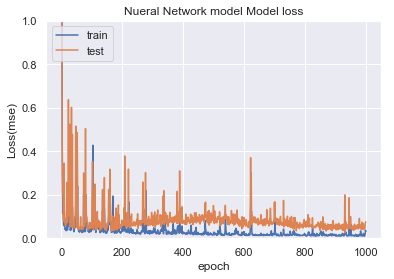

In [486]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nueral Network model Model loss')
plt.ylim(0,1)
plt.ylabel('Loss(mse)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [487]:
kerasModel.predict(X_test)
y_test_nn=pd.DataFrame((kerasModel.predict(test_data)))

In [488]:
solution = pd.concat([test.Id, np.exp(y_test_nn)],axis=1)
solution=solution.rename(columns={0:"SalePrice"})
solution.to_csv("result_nn.csv", index = False)

Neural Network model provides 0.091 rms in validation data which is quite small compared to other methods. However, this is not true for actual Test dataset. The results from Kaggle leaderboard score shows that Neural Network based model provided worst performance among the models.

<a id='results'></a>
## Results

In [458]:
from IPython.display import Image

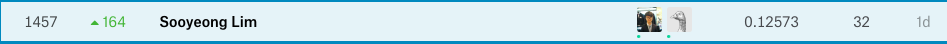

In [460]:
Image(filename='ranking.png') 

* **[Figure. 9] Lasso regression model's leader board score**

Lasso regression model yields 0.12573 rmse. This is actually best performance among the other models we tried. This model ranked 1457th out of 4389 participants.

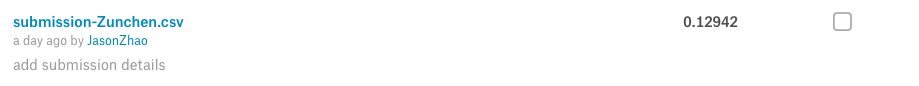

In [462]:
Image(filename='xgboostRanking.png') 

* **[Figure. 10] Xgboost model's leader board score**

Xgboost model yields slightly higher rmse than lasso model. It ended up 0.12942 rmse. Although this Xgboost shows better performance for validation dataset, it provided larger rmse. We suspected that this is because the number of training dataset is realatively small if we consider the number of test datset. This may result in overfitting our model to training data. 

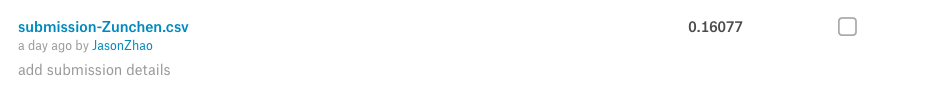

In [489]:
Image(filename='nnRanking.png') 

* **[Figure. 11] Neural Network model's leader board score**

Neural Network model showed worst performance among other model candidates. Before we ran the model, we expected that Neural Network probably will produce smallest rmse. However, this was not the case. Maybe it is possible to imporove Neural Network model's performance by doing more hyperparamter tuning with higher computing power. Since we ran this model soely from laptop, however, we could not apply much adavanced technique(e.g. Deep Nueral Network) to train this model.

<a id='limitation'></a>

### Limitation

1. The training data and test dataset have a same size and the performance of the model might be improved that if we can obtain more dataset. 

2. Although we tried to used grid search method, it is difficult to find the global optimal points of hyperparameters. There is a possibility that the fitted model is not an optimal model

3. Since we worked with our laptop, we could not use GPU, we might have intruded much complex model and tried more hyperparameter tuning if we use GPU. 


<a id='limitation'></a>
### Conclusion

In this notebook, we provided extensive analysis and strategy of a Kaggle project- [House Price: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). We proposed three different models to solve this problem. Although, Neural Network model showed best performance in trainig-validation rmse but the best performance model in the actual test dataset is Lasso regression. We suspected that this is because the model is overfitted to training dataset. With Lasso Regression model, we got rmse-0.12573 and landed us 1457th out of 4389 participants.

<a id='reference'></a>
### Reference/Resource

[1] https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset * Regression method

[2] https://github.com/Sooyeong/CSE627_project * Implementation repository

[3] https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions * Grid search method

[4] https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=3824453&userName=sylims6 Visualization & performance comparision